# `Pivot Tables,CrossTab,GroupBy`:

**<font color=red>With Mr. Fugu Data Sciecne</font>**

# (◕‿◕✿)

[youtube](https://www.youtube.com/channel/UCbni-TDI-Ub8VlGaP8HLTNw/) | [github](github.com/MrFuguDataScience)

# Purpose & Outcome:

+ Investigate a few different datasets and create multiple `Pivot Tables`
    + Use Group-By for aggregating and creating similar tables
+ Show an example of `CrossTab`

+ `Outcome`: exposure to `Pivot tables,CrossTab,GroupBy` because this will come up in real life (i.e. *on the job*)

In [1]:
import pandas as pd

In [339]:
businesses_berkeley=pd.read_csv('berkeley_business.csv')
businesses_berkeley.head()

,Unnamed: 0,Company,Industry,NUMBER,STREET,UNIT,CITY,POSTCODE,LON,LAT
0,0,"Little, Mcdonald and Miller",Science writer,2550,DANA ST,NaN,BERKELEY,94704,-122.260714,37.863205
1,1,"Carter, Douglas and Taylor",Occupational therapist,1012,GRAYSON ST,A,BERKELEY,94710,-122.289434,37.855691
2,2,"Ramirez, Nichols and King","Horticulturist, commercial",1012,GRAYSON ST,C,BERKELEY,94710,-122.289434,37.855691
3,3,"Berry, Webb and Blackburn",Arts administrator,1813,NINTH ST,NaN,BERKELEY,94710,-122.294703,37.870741
4,4,Ramirez and Sons,Prison officer,1901,CURTIS ST,NaN,BERKELEY,94702,-122.289390,37.870799


**Side Note**:

+ `Pivot`: `Df.pivot()` reshapes databased on `Columns`

+ `Pivot Table`: `Df.pivot_table()` creates a pivot table as a DF, allowing you to `aggregate and tabulate` your data

`------------------------------------------`

# `Look at each industry and what companies are there by zipcode`:

In [12]:
businesses_berkeley.pivot_table('POSTCODE',['Industry','Company']).head()

POSTCODE
Industry              Company                             
Academic librarian    Anderson PLC                   94709
                      Blake, Thomas and Shields      94705
Accountant, chartered Johns-Kennedy                  94709
Actor                 Williams-Benson                94709
Administrator         Snyder, Christian and Sims     94704

# Look at what Business types are in each zipcode:

In [306]:
pd.pivot_table(businesses_berkeley,index=['POSTCODE','Industry']).head()

LAT         LON  NUMBER  Unnamed: 0
POSTCODE Industry                                                          
94702    Animal nutritionist      37.871555 -122.290892  1140.0        30.0
         Banker                   37.872453 -122.289331  1211.0       147.0
         Biomedical scientist     37.870494 -122.285750  1336.0        93.0
         Building surveyor        37.874007 -122.291142  1644.0       226.0
         Chartered loss adjuster  37.850990 -122.282390  1314.0         7.0

In [30]:
pd.pivot_table(businesses_berkeley,index=['POSTCODE','Industry'],
               values=['LAT','LON']).head()

LAT         LON
POSTCODE Industry                                      
94702    Animal nutritionist      37.871555 -122.290892
         Banker                   37.872453 -122.289331
         Biomedical scientist     37.870494 -122.285750
         Building surveyor        37.874007 -122.291142
         Chartered loss adjuster  37.850990 -122.282390

In [99]:
pd.pivot_table(businesses_berkeley,index=['POSTCODE','Industry','Company'],
               values=['LAT','LON']).head()

LAT  \
POSTCODE Industry                Company                                  
94702    Animal nutritionist     White-Taylor                 37.871555   
         Banker                  Richardson-Pratt             37.872453   
         Biomedical scientist    Garcia and Sons              37.870494   
         Building surveyor       Jackson LLC                  37.874007   
         Chartered loss adjuster Lin, Sanchez and Strickland  37.850990   

                                                                     LON  
POSTCODE Industry                Company                                  
94702    Animal nutritionist     White-Taylor                -122.290892  
         Banker                  Richardson-Pratt            -122.289331  
         Biomedical scientist    Garcia and Sons             -122.285750  
         Building surveyor       Jackson LLC                 -122.291142  
         Chartered loss adjuster Lin, Sanchez and Strickland -122.282390

# Investigate Cpu Sales Dataset: (*fake data*) I made

In [45]:
cpu_purch=pd.read_csv('cpu_purchase.csv')
cpu_purch.head()

,credit_card,cpu,purchase_date
0,5399-3484-4724-7187,Intel Core i1-7554K,2019-10-31
1,1630-5261-6108-7631,AMD Ryzen 1 5827X,2017-07-16
2,4435-3866-1076-3595,Intel Core i5-9457K,2019-03-24
3,3489-7099-9906-8660,AMD Ryzen 4 3401X,2019-06-15
4,8631-4500-5666-1510,Intel Core i6-7283K,2019-11-11


In [106]:
# Need to convert datatype:
(cpu_purch.purchase_date)

dtype('O')

# Order By CPU and Purchase date

In [344]:
# convert date formating from 'Object' datatype by using (coerce)

cpu_purch['purchase_date'] = pd.to_datetime(cpu_purch['purchase_date'], errors='coerce')


cpu_purch.groupby(['cpu', pd.Grouper(key='date')]).sum().head()

# cpu_purch.groupby(['cpu', pd.Grouper( freq='M',key='purchase_date')]).sum()

credit_card
cpu               date                           
AMD Ryzen 1 1113X 2017-07-10  5096-6864-3213-7452
                  2018-08-10  2845-8551-5843-1161
AMD Ryzen 1 1140X 2018-08-28  3745-1287-4225-1405
AMD Ryzen 1 1147X 2017-12-25  7060-7556-3298-6448
AMD Ryzen 1 1157X 2018-06-27  6619-1618-6318-5428

# Orders By Purchase_date

In [342]:
cpu_purch.groupby(['purchase_date', pd.Grouper( key='cpu')]).sum()

credit_card
purchase_date cpu                                     
2017-05-27    AMD Ryzen 8 2427X    2013-3704-5291-5501
              Intel Core i3-5651K  3855-5430-4405-9081
              Intel Core i6-3204K  6851-2922-2372-6103
              Intel Core i8-6570K  5384-4603-6704-4175
              Intel Core i8-9947K  2015-3109-5041-8116
...                                                ...
2020-05-26    AMD Ryzen 8 2392X    6249-5584-9502-2011
              AMD Ryzen 8 9992X    9441-2956-2418-3205
              AMD Ryzen 9 3919X    3449-5952-4148-3526
              Intel Core i1-6126K  7272-5144-9722-9412
              Intel Core i4-8790K  1040-4794-1572-1603

[5826 rows x 1 columns]

# Create JSON File format from Nested Table:

In [151]:
# Where (df) is your pivot_table

# df.reset_index().to_json(orient='records')

# Investigate Online Retail Sales Data:

In [203]:
# retail_sales=pd.read_csv('online_sales.csv',encoding= 'unicode_escape')
retail_sales=pd.read_csv('SalesDataNoCancels.csv')
retail_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty,Matches
0,563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,1,False
1,568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,1,False
2,556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,1,False
3,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,1,False
4,547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,1,False


In [204]:
retail_subset=retail_sales[['InvoiceNo','Description','Quantity','UnitPrice','Country']]
retail_subset.head()

,InvoiceNo,Description,Quantity,UnitPrice,Country
0,563614,DOLLY GIRL BEAKER,200,1.08,Australia
1,568708,I LOVE LONDON MINI BACKPACK,4,4.15,Australia
2,556917,10 COLOUR SPACEBOY PEN,48,0.85,Australia
3,543989,12 PENCIL SMALL TUBE WOODLAND,384,0.55,Australia
4,547659,12 PENCILS TALL TUBE POSY,12,0.85,Australia


In [346]:
pd.pivot_table(retail_subset,index=['Country','Description'],values='Quantity')

Quantity
Country     Description                            
Australia    DOLLY GIRL BEAKER                200.0
             I LOVE LONDON MINI BACKPACK        4.0
            10 COLOUR SPACEBOY PEN             48.0
            12 PENCIL SMALL TUBE WOODLAND     384.0
            12 PENCILS TALL TUBE POSY         126.0
...                                             ...
Unspecified WRAP POPPIES  DESIGN               25.0
            WRAP SUKI AND FRIENDS              25.0
            WRAP VINTAGE PETALS  DESIGN        25.0
            WRAP WEDDING DAY                   25.0
            ZINC METAL HEART DECORATION         2.0

[19100 rows x 1 columns]

In [186]:
# While Correct, gives error: just change formatting or do below option!

# retail_subset['Order_Totals']=retail_subset['Quantity']*retail_subset['UnitPrice']
# retail_subset.head()

In [206]:
# Create Order_Totals Column based on Qty * Price:

# pandas.assign(): Returns a new object w/ all original columns and new ones as well.

retail_w_totalPrices=retail_subset.assign(Order_Tot = lambda x: x.UnitPrice * x.Quantity)
retail_w_totalPrices.head()

,InvoiceNo,Description,Quantity,UnitPrice,Country,Order_Tot
0,563614,DOLLY GIRL BEAKER,200,1.08,Australia,216.0
1,568708,I LOVE LONDON MINI BACKPACK,4,4.15,Australia,16.6
2,556917,10 COLOUR SPACEBOY PEN,48,0.85,Australia,40.8
3,543989,12 PENCIL SMALL TUBE WOODLAND,384,0.55,Australia,211.2
4,547659,12 PENCILS TALL TUBE POSY,12,0.85,Australia,10.2


# Orders By Country with (*British Pounds* by Items sold)

In [347]:
tty=pd.pivot_table(retail_w_totalPrices,index=['Country','Description'],
               values='Order_Tot',aggfunc='sum').head()
tty

Order_Tot
Country   Description                             
Australia  DOLLY GIRL BEAKER                 216.0
           I LOVE LONDON MINI BACKPACK        16.6
          10 COLOUR SPACEBOY PEN              40.8
          12 PENCIL SMALL TUBE WOODLAND      211.2
          12 PENCILS TALL TUBE POSY           79.8

# Simple Plot: Items sold vs Qty

Text(0, 0.5, 'Qty Sold')

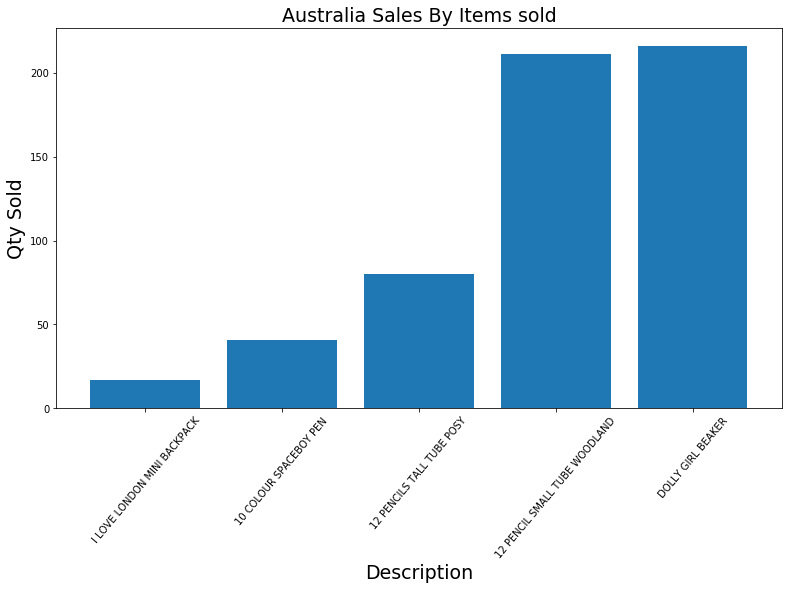

In [331]:
tty=tty.sort_values('Order_Tot')
aussie=tty['Order_Tot']['Australia']

ax=aussie.plot.bar(figsize=(13, 7),rot=50,width=.8)
ax.set_title('Australia Sales By Items sold',fontsize=19)
ax.set_xlabel("Description",fontsize=19)
ax.set_ylabel("Qty Sold",fontsize=19)

# Orders By Invoice Number with Total Prices by each item:

In [349]:
pd.pivot_table(retail_w_totalPrices,index=['InvoiceNo','Description',
                                           'Quantity','UnitPrice'],
               values='Order_Tot',aggfunc='sum')

Order_Tot
InvoiceNo Description                         Quantity UnitPrice           
536365    CREAM CUPID HEARTS COAT HANGER      8        2.75           22.00
          GLASS STAR FROSTED T-LIGHT HOLDER   6        4.25           25.50
          KNITTED UNION FLAG HOT WATER BOTTLE 6        3.39           20.34
          RED WOOLLY HOTTIE WHITE HEART.      6        3.39           20.34
          SET 7 BABUSHKA NESTING BOXES        2        7.65           15.30
...                                                                     ...
581587    CIRCUS PARADE LUNCH BOX             12       1.95           23.40
          PACK OF 20 SPACEBOY NAPKINS         12       0.85           10.20
          PLASTERS IN TIN CIRCUS PARADE       12       1.65           19.80
          PLASTERS IN TIN STRONGMAN           12       1.65           19.80
          SPACEBOY LUNCH BOX                  12       1.95           23.40

[387219 rows x 1 columns]

`------------------------------------------------`


# `CrossTab`: By default creates a `frequency table`, where you use 2 or more factors for comparison.

+ `Required`: you need to provide an `Index` and `Columns`
    + `Index`: the values you will group by rows
    + `Columns`: values for the column to group-by
    + The type need to be: Either `Array, Series (like)` for both above

*Note*: `.sum(axis=0)` By Row, replace with a `1` if you want by column


In [229]:
pd.crosstab(businesses_berkeley.Industry,businesses_berkeley.Company).head()
# .sum(1)

Company,Adams PLC,"Adams, Rubio and Sharp","Adkins, Torres and Chapman",Alexander and Sons,"Allen, Wright and Flores","Allen, Yang and Chavez","Allison, Martinez and Lopez",Allison-Jackson,"Alvarado, Myers and Thornton",Anderson Inc,...,Woods-Carter,Woods-Proctor,"Wright, Bryant and Johnson","Wright, Jones and Greene",Wright-Gray,Wright-Holt,Wu-Elliott,"Wyatt, Shea and Hernandez",Young-Cardenas,Zhang Group
Industry,,,,,,,,,,,,,,,,,,,,,
Academic librarian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Accountant, chartered",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Administrator,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Administrator, sports",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Citations & Help:

https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    
https://www.youtube.com/results?search_query=pivot+tables+in+python

https://stackoverflow.com/questions/47860292/creating-a-pivot-table-in-pandas-and-grouping-at-the-same-time-the-dates-per-wee

https://www.dataquest.io/blog/pandas-pivot-table/

https://dfrieds.com/data-analysis/pivot-table-python-pandas.html

https://pandas.pydata.org/pandas-docs/version/0.15.0/reshaping.html

https://www.quora.com/In-pandas-whats-the-difference-between-dataframe-pivot-and-dataframe-pivot_table

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

https://janakiev.com/blog/pandas-multiindex-pivot/